In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from joblib import dump, load

In [2]:
model = load('titanic1.0_model.joblib') 


In [3]:
X_test = pd.read_csv("test.csv")

In [7]:
X_test.drop(["Name","Ticket","Cabin"],axis = 1 , inplace = True)

In [8]:
X_test.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    male  34.5      0      0   7.8292        Q
1          893       3  female  47.0      1      0   7.0000        S
2          894       2    male  62.0      0      0   9.6875        Q
3          895       3    male  27.0      0      0   8.6625        S
4          896       3  female  22.0      1      1  12.2875        S

In [9]:
X_test.dropna(subset= ["Embarked"] , inplace = True) # drop the row as NAN count was 2 only which is very low

In [10]:
from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder() 
X_test['Sex']= label_encoder.fit_transform(X_test['Sex']) 

In [11]:
X_test['Embarked']= label_encoder.fit_transform(X_test['Embarked']) 

In [12]:
X_test.describe()

PassengerId      Pclass         Sex         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    2.265550    0.636364   30.272590    0.447368   
std     120.810458    0.841838    0.481622   14.181209    0.896760   
min     892.000000    1.000000    0.000000    0.170000    0.000000   
25%     996.250000    1.000000    0.000000   21.000000    0.000000   
50%    1100.500000    3.000000    1.000000   27.000000    0.000000   
75%    1204.750000    3.000000    1.000000   39.000000    1.000000   
max    1309.000000    3.000000    1.000000   76.000000    8.000000   

            Parch        Fare    Embarked  
count  418.000000  417.000000  418.000000  
mean     0.392344   35.627188    1.401914  
std      0.981429   55.907576    0.854496  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.895800    1.000000  
50%      0.000000   14.454200    2.000000  
75%      0.000000   31.500000    2.000000  
max      9.000000  512.329200    2.000000

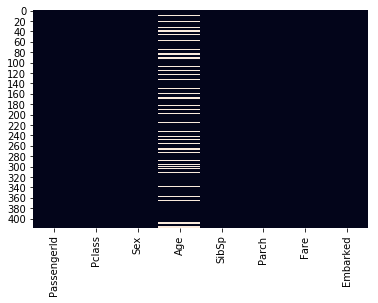

In [13]:
sns.heatmap(X_test.isnull(),cbar=False) # findout the null values

In [15]:
from sklearn.impute import SimpleImputer
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
imputer = SimpleImputer(strategy="median")
imputer.fit(X_test)

imputer.statistics_

X_1 = imputer.transform(X_test)
X_tr = pd.DataFrame(X_1, columns=X_test.columns)

In [17]:
X_tr.describe()

PassengerId      Pclass         Sex         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    2.265550    0.636364   29.599282    0.447368   
std     120.810458    0.841838    0.481622   12.703770    0.896760   
min     892.000000    1.000000    0.000000    0.170000    0.000000   
25%     996.250000    1.000000    0.000000   23.000000    0.000000   
50%    1100.500000    3.000000    1.000000   27.000000    0.000000   
75%    1204.750000    3.000000    1.000000   35.750000    1.000000   
max    1309.000000    3.000000    1.000000   76.000000    8.000000   

            Parch        Fare    Embarked  
count  418.000000  418.000000  418.000000  
mean     0.392344   35.576535    1.401914  
std      0.981429   55.850103    0.854496  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.895800    1.000000  
50%      0.000000   14.454200    2.000000  
75%      0.000000   31.471875    2.000000  
max      9.000000  512.329200    2.000000

In [21]:
y_test = model.predict(X_tr)

In [24]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [28]:
df = pd.DataFrame({"PassengerId":X_tr["PassengerId"],"Survived":y_test}) 
# saving the dataframe 
s2 = df.astype('int64', copy=False)
s2.to_csv('final_predictions_for_titanic.csv', index=False) 
